In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных из репозитория

In [3]:
# train
train = pd.read_csv('https://github.com/Quantanomo/data_sets/raw/master/CAX_MortgageModeling_Train.csv')
train.head(2)


,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,...,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
0,CAX_Train_1,1,900000,5429,61.98,65.00,71.63,360,1040000.0,4.0,...,Single Detached,12,L4C,Under 25,Male,108000,8,44-45,681,FUNDED
1,CAX_Train_2,2,386000,2179,35.22,74.29,40.65,360,390000.0,4.5,...,Single Detached,12,L9T,70 and over,Male,78000,2,56,710,FUNDED


In [4]:
# test
test = pd.read_csv('https://github.com/Quantanomo/data_sets/raw/master/CAX_MortgageModeling_Test.csv')
test.head()

,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,...,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
0,CAX_Test_1,45643,430000,1861,34.51,75.00,35.60,360,322500.0,4.25,...,High Rise,24,M9B,45-49,Male,76000,8,23,834,NaN
1,CAX_Test_2,45644,676000,1032,37.18,55.51,37.50,360,375000.0,5.00,...,Semi-Detached,12,M3N,55-59,Female,75000,2,56,804,NaN
2,CAX_Test_3,45645,418000,949,23.30,79.90,32.88,360,334000.0,4.75,...,Single Detached,60,K2H,30-34,Male,70000,8,72,730,NaN
3,CAX_Test_4,45646,693000,3059,42.45,80.00,42.59,360,554400.0,4.25,...,Single Detached,24,L3R,Under 25,Female,90000,2,44-45,786,NaN
4,CAX_Test_5,45647,324000,1554,42.97,75.00,43.48,360,243000.0,4.00,...,Single Detached,12,L2S,35-39,Male,48000,2,56,787,NaN


In [5]:
train.dtypes

Unique_ID             object
MORTGAGE NUMBER        int64
PROPERTY VALUE         int64
MORTGAGE PAYMENT       int64
GDS                  float64
LTV                  float64
TDS                  float64
AMORTIZATION           int64
MORTGAGE AMOUNT      float64
RATE                 float64
MORTGAGE PURPOSE      object
PAYMENT FREQUENCY     object
PROPERTY TYPE         object
TERM                   int64
FSA                   object
AGE RANGE             object
GENDER                object
INCOME                 int64
INCOME TYPE            int64
NAICS CODE            object
CREDIT SCORE           int64
RESULT                object
dtype: object

In [6]:
# Переименую колонки для удобного обращения к ним

train = train.rename(columns = {
    'MORTGAGE NUMBER': 'MORTGAGE_NUMBER',
    'PROPERTY VALUE': 'PROPERTY_VALUE',
    'MORTGAGE PAYMENT': 'MORTGAGE_PAYMENT',
    'MORTGAGE PURPOSE': 'MORTGAGE_PURPOSE',
    'PAYMENT FREQUENCY': 'PAYMENT_FREQUENCY',
    'MORTGAGE AMOUNT': 'MORTGAGE_AMOUNT',
    'PROPERTY TYPE': 'PROPERTY_TYPE',
    'AGE RANGE': 'AGE_RANGE',
    'INCOME TYPE': 'INCOME_TYPE',
    'NAICS CODE': 'NAICS_CODE',
    'CREDIT SCORE': 'CREDIT_SCORE'
})

train.head(2)

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,...,PROPERTY_TYPE,TERM,FSA,AGE_RANGE,GENDER,INCOME,INCOME_TYPE,NAICS_CODE,CREDIT_SCORE,RESULT
0,CAX_Train_1,1,900000,5429,61.98,65.00,71.63,360,1040000.0,4.0,...,Single Detached,12,L4C,Under 25,Male,108000,8,44-45,681,FUNDED
1,CAX_Train_2,2,386000,2179,35.22,74.29,40.65,360,390000.0,4.5,...,Single Detached,12,L9T,70 and over,Male,78000,2,56,710,FUNDED


In [7]:
test = test.rename(columns = {
    'MORTGAGE NUMBER': 'MORTGAGE_NUMBER',
    'PROPERTY VALUE': 'PROPERTY_VALUE',
    'MORTGAGE PAYMENT': 'MORTGAGE_PAYMENT',
    'MORTGAGE AMOUNT': 'MORTGAGE_AMOUNT',
    'MORTGAGE PURPOSE': 'MORTGAGE_PURPOSE',
    'PAYMENT FREQUENCY': 'PAYMENT_FREQUENCY',
    'PROPERTY TYPE': 'PROPERTY_TYPE',
    'AGE RANGE': 'AGE_RANGE',
    'INCOME TYPE': 'INCOME_TYPE',
    'NAICS CODE': 'NAICS_CODE',
    'CREDIT SCORE': 'CREDIT_SCORE'
})

test.head(2)

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,...,PROPERTY_TYPE,TERM,FSA,AGE_RANGE,GENDER,INCOME,INCOME_TYPE,NAICS_CODE,CREDIT_SCORE,RESULT
0,CAX_Test_1,45643,430000,1861,34.51,75.00,35.6,360,322500.0,4.25,...,High Rise,24,M9B,45-49,Male,76000,8,23,834,NaN
1,CAX_Test_2,45644,676000,1032,37.18,55.51,37.5,360,375000.0,5.00,...,Semi-Detached,12,M3N,55-59,Female,75000,2,56,804,NaN


In [8]:
# Зависимый признак RESULT перекодирую в 1,0
train = pd.concat([train, pd.get_dummies(train['RESULT'], prefix ='RESULT')], axis=1)

train = train.drop(['RESULT', 'RESULT_NOT FUNDED'], axis=1)
train.head(2)

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,...,PROPERTY_TYPE,TERM,FSA,AGE_RANGE,GENDER,INCOME,INCOME_TYPE,NAICS_CODE,CREDIT_SCORE,RESULT_FUNDED
0,CAX_Train_1,1,900000,5429,61.98,65.00,71.63,360,1040000.0,4.0,...,Single Detached,12,L4C,Under 25,Male,108000,8,44-45,681,1
1,CAX_Train_2,2,386000,2179,35.22,74.29,40.65,360,390000.0,4.5,...,Single Detached,12,L9T,70 and over,Male,78000,2,56,710,1


## Feature engineering

Для первой модели я удалю все GENDER = 'unknown' и признаки FSA (Почтовый индекс), GDS

UPD: Поскольку в тестовых выборках тоже есть неизвестный пол. Мне стоит либо совсем исключить GENDER, либо научиться его предсказывать. Для начала исключу

In [9]:
#train_1 = train[train.GENDER != 'Unknown']
#train_1 = train_1.drop(['FSA', 'GDS'], axis=1)

train_1 = train.drop(['FSA', 'GDS', 'GENDER', 'NAICS_CODE', 'AMORTIZATION', 'PROPERTY_TYPE', 'INCOME_TYPE'], axis=1)
train_1.head(2)

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,LTV,TDS,MORTGAGE_AMOUNT,RATE,MORTGAGE_PURPOSE,PAYMENT_FREQUENCY,TERM,AGE_RANGE,INCOME,CREDIT_SCORE,RESULT_FUNDED
0,CAX_Train_1,1,900000,5429,65.00,71.63,1040000.0,4.0,Refinance,Monthly,12,Under 25,108000,681,1
1,CAX_Train_2,2,386000,2179,74.29,40.65,390000.0,4.5,Refinance,Monthly,12,70 and over,78000,710,1


In [10]:
# Перекодируем AGE_RANGE в числовой формат со средним по диапазону возраста
pd.options.mode.chained_assignment = None  # default='warn'


train_1.AGE_RANGE[train_1.AGE_RANGE == 'Under 25'] = '0-25'
train_1.AGE_RANGE[train_1.AGE_RANGE == '70 and over'] = '70-100'

# Функция среднего
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

train_1['AGE_MEAN'] = train_1['AGE_RANGE'].apply(lambda x: split_mean(x))
train_1 = train_1.drop('AGE_RANGE', axis=1)
train_1.head()

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,LTV,TDS,MORTGAGE_AMOUNT,RATE,MORTGAGE_PURPOSE,PAYMENT_FREQUENCY,TERM,INCOME,CREDIT_SCORE,RESULT_FUNDED,AGE_MEAN
0,CAX_Train_1,1,900000,5429,65.00,71.63,1040000.0,4.0,Refinance,Monthly,12,108000,681,1,12.5
1,CAX_Train_2,2,386000,2179,74.29,40.65,390000.0,4.5,Refinance,Monthly,12,78000,710,1,85.0
2,CAX_Train_3,3,531000,2152,80.00,35.41,424800.0,3.5,Purchase,Monthly,6,87000,709,1,37.0
3,CAX_Train_4,4,1200000,5410,75.00,34.14,960000.0,5.5,Purchase,Monthly,12,300000,761,1,47.0
4,CAX_Train_5,5,350000,3342,80.00,34.85,592000.0,5.0,Refinance,Monthly,12,147000,762,1,52.0


In [11]:
# в MORTGAGE_PURPOSE закодирую только Purchase
train_1['MORTGAGE_PURPOSE'] = np.where(train_1['MORTGAGE_PURPOSE'].str.contains('Purchase'), 1, 0)
train_1.head()

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,LTV,TDS,MORTGAGE_AMOUNT,RATE,MORTGAGE_PURPOSE,PAYMENT_FREQUENCY,TERM,INCOME,CREDIT_SCORE,RESULT_FUNDED,AGE_MEAN
0,CAX_Train_1,1,900000,5429,65.00,71.63,1040000.0,4.0,0,Monthly,12,108000,681,1,12.5
1,CAX_Train_2,2,386000,2179,74.29,40.65,390000.0,4.5,0,Monthly,12,78000,710,1,85.0
2,CAX_Train_3,3,531000,2152,80.00,35.41,424800.0,3.5,1,Monthly,6,87000,709,1,37.0
3,CAX_Train_4,4,1200000,5410,75.00,34.14,960000.0,5.5,1,Monthly,12,300000,761,1,47.0
4,CAX_Train_5,5,350000,3342,80.00,34.85,592000.0,5.0,0,Monthly,12,147000,762,1,52.0


In [12]:
# в PAYMENT_FREQUENCY только Monthly
train_1['PAYMENT_FREQUENCY'] = np.where(train_1['PAYMENT_FREQUENCY'].str.contains('Monthly'), 1, 0)
train_1.head()

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,LTV,TDS,MORTGAGE_AMOUNT,RATE,MORTGAGE_PURPOSE,PAYMENT_FREQUENCY,TERM,INCOME,CREDIT_SCORE,RESULT_FUNDED,AGE_MEAN
0,CAX_Train_1,1,900000,5429,65.00,71.63,1040000.0,4.0,0,1,12,108000,681,1,12.5
1,CAX_Train_2,2,386000,2179,74.29,40.65,390000.0,4.5,0,1,12,78000,710,1,85.0
2,CAX_Train_3,3,531000,2152,80.00,35.41,424800.0,3.5,1,1,6,87000,709,1,37.0
3,CAX_Train_4,4,1200000,5410,75.00,34.14,960000.0,5.5,1,1,12,300000,761,1,47.0
4,CAX_Train_5,5,350000,3342,80.00,34.85,592000.0,5.0,0,1,12,147000,762,1,52.0


#### One-hot encoding

In [479]:
#train_1 = pd.concat([train_1,pd.get_dummies(train_1['FSA'], prefix ='FSA')], axis=1)
#train_1 = train_1.drop('FSA', axis=1)

In [13]:
# создам train со сбалансированным y
train_res_1 = train_1[train.RESULT_FUNDED == 1].sample(9619)

train_res_0 = train_1[train.RESULT_FUNDED == 0]

train_1 = train_res_1.append(train_res_0)

In [32]:
# Разделю выборку и удалю ненужные фичи
x = train_1.drop(['MORTGAGE_NUMBER','RESULT_FUNDED'], axis=1)
y = train_1.RESULT_FUNDED

# Разделим данные на train и test в пропорции 0,75/0,25
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state=42)

In [37]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16352 entries, 38943 to 29143
Data columns (total 13 columns):
Unique_ID            16352 non-null object
PROPERTY_VALUE       16352 non-null int64
MORTGAGE_PAYMENT     16352 non-null int64
LTV                  16352 non-null float64
TDS                  16352 non-null float64
MORTGAGE_AMOUNT      16352 non-null float64
RATE                 16352 non-null float64
MORTGAGE_PURPOSE     16352 non-null int32
PAYMENT_FREQUENCY    16352 non-null int32
TERM                 16352 non-null int64
INCOME               16352 non-null int64
CREDIT_SCORE         16352 non-null int64
AGE_MEAN             16352 non-null float64
dtypes: float64(5), int32(2), int64(5), object(1)
memory usage: 1.6+ MB


### XGBoost

In [34]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import GridSearchCV 
# from sklearn.metrics import metrics

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

IDcol = 'Unique_ID'

In [35]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [38]:
#Choose all predictors except target & IDcols
predictors = [x for x in x_train.columns if x not in [y_train, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, x_train, predictors)

TypeError: invalid type comparison

#### Random forest

In [483]:
rf = RandomForestClassifier()

# Определение гиперпараметров для модели

n_estimators = list(range(4,16, 3))
max_depth = list(range(8,20,4))
min_samples_leaf = list(range(6,20,4))
min_samples_split = list(range(60,150,20))

parametrs = {'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_leaf': min_samples_leaf,
            'min_samples_split': min_samples_split}

In [484]:
grid_search_cv_rf = GridSearchCV(rf, parametrs, cv=6, n_jobs=-1)
grid_search_cv_rf.fit(x_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [4, 7, 10, 13], 'max_depth': [8, 12, 16], 'min_samples_leaf': [6, 10, 14, 18], 'min_samples_split': [60, 80, 100, 120, 140]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### Валидация

In [485]:
grid_search_cv_rf.best_params_

{'max_depth': 12,
 'min_samples_leaf': 6,
 'min_samples_split': 120,
 'n_estimators': 13}

In [486]:
best_rf = grid_search_cv_rf.best_estimator_

In [487]:
# Предскажем класс на тестовой выборке
predicted = best_rf.predict(x_test)

Text(0.5, 1.0, 'Confusion Matrix')

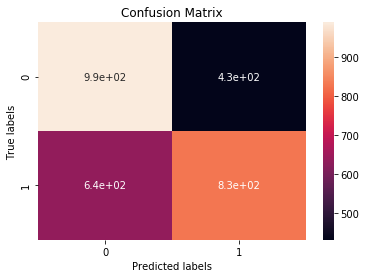

In [488]:
# Построим матрицу ошибок
df = confusion_matrix(y_test,predicted)

# Визуализируем матрицу
ax = plt.subplot()
sns.heatmap(df, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [489]:
# Посмотрим точность модели
print('F1-метрика модели:', f1_score(y_test,predicted))

F1-метрика модели: 0.6087275394206088


In [490]:
# Определение важности фичей
feature_importances = best_rf.feature_importances_

feature_importances_df = pd.DataFrame({'features': list(x_train),
                                      'features_importances': feature_importances })

feature_importances_df.sort_values('features_importances', ascending=False)

,features,features_importances
7,PAYMENT_FREQUENCY,0.187443
3,TDS,0.113064
2,LTV,0.106905
1,MORTGAGE_PAYMENT,0.095427
4,MORTGAGE_AMOUNT,0.085707
10,CREDIT_SCORE,0.084846
6,MORTGAGE_PURPOSE,0.081540
0,PROPERTY_VALUE,0.067406
5,RATE,0.066608
9,INCOME,0.058285


### Подготовка результатов

In [363]:
test_1 = test.drop(['FSA', 'GDS', 'GENDER'], axis=1)
test_1.head(2)

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,MORTGAGE_PURPOSE,PAYMENT_FREQUENCY,PROPERTY_TYPE,TERM,AGE_RANGE,INCOME,INCOME_TYPE,NAICS_CODE,CREDIT_SCORE,RESULT
0,CAX_Test_1,45643,430000,1861,75.00,35.6,360,322500.0,4.25,Refinance,Monthly,High Rise,24,45-49,76000,8,23,834,NaN
1,CAX_Test_2,45644,676000,1032,55.51,37.5,360,375000.0,5.00,Purchase,Bi-Weekly,Semi-Detached,12,55-59,75000,2,56,804,NaN


In [364]:
# Перекодируем AGE_RANGE в числовой формат со средним по диапазону возраста
pd.options.mode.chained_assignment = None  # default='warn'

test_1.AGE_RANGE[test_1.AGE_RANGE == 'Under 25'] = '0-25'
test_1.AGE_RANGE[test_1.AGE_RANGE == '70 and over'] = '70-100'

test_1['AGE_MEAN'] = test_1['AGE_RANGE'].apply(lambda x: split_mean(x))
test_1 = test_1.drop('AGE_RANGE', axis=1)
test_1.head()

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,MORTGAGE_PURPOSE,PAYMENT_FREQUENCY,PROPERTY_TYPE,TERM,INCOME,INCOME_TYPE,NAICS_CODE,CREDIT_SCORE,RESULT,AGE_MEAN
0,CAX_Test_1,45643,430000,1861,75.00,35.60,360,322500.0,4.25,Refinance,Monthly,High Rise,24,76000,8,23,834,NaN,47.0
1,CAX_Test_2,45644,676000,1032,55.51,37.50,360,375000.0,5.00,Purchase,Bi-Weekly,Semi-Detached,12,75000,2,56,804,NaN,57.0
2,CAX_Test_3,45645,418000,949,79.90,32.88,360,334000.0,4.75,Refinance,Bi-Weekly,Single Detached,60,70000,8,72,730,NaN,32.0
3,CAX_Test_4,45646,693000,3059,80.00,42.59,360,554400.0,4.25,Purchase,Monthly,Single Detached,24,90000,2,44-45,786,NaN,12.5
4,CAX_Test_5,45647,324000,1554,75.00,43.48,360,243000.0,4.00,Purchase,Monthly,Single Detached,12,48000,2,56,787,NaN,37.0


In [295]:
test_1.PROPERTY_TYPE.unique()

array([0, 1], dtype=int64)

In [296]:
x_test1 = test_1.drop(['MORTGAGE_NUMBER','Unique_ID','RESULT'], axis=1)

In [297]:
x_train.shape, x_test1.shape

((14428, 36), (15214, 36))

In [298]:
Result_Predicted = best_rf.predict(x_test1)

In [299]:
d = {'Unique_ID': test_1.Unique_ID,
    'Result_Predicted': Result_Predicted}

In [300]:
result = pd.DataFrame(data=d)

In [301]:
result.Result_Predicted[result.Result_Predicted == 1] = 'FUNDED'

C:\Users\market1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [302]:
result.Result_Predicted[result.Result_Predicted == 0] = 'NOT FUNDED'

In [303]:
# Сохраняю результат
result.to_csv('CAX_MortgageModeling_SubmissionFormat_1.csv', index=False)

In [470]:
# Определение важности фичей
feature_importances = best_rf.feature_importances_

feature_importances_df = pd.DataFrame({'features': list(x_train),
                                      'features_importances': feature_importances })

feature_importances_df.sort_values('features_importances', ascending=False)

,features,features_importances
7,PAYMENT_FREQUENCY,0.173227
2,LTV,0.105725
6,MORTGAGE_PURPOSE,0.093980
1,MORTGAGE_PAYMENT,0.088161
5,RATE,0.084228
3,TDS,0.074958
4,MORTGAGE_AMOUNT,0.065872
0,PROPERTY_VALUE,0.042837
9,INCOME,0.025397
10,CREDIT_SCORE,0.019584
